<a href="https://colab.research.google.com/github/YanaMinyaylo/NS/blob/main/NN_LSTM_29_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
from scipy import signal
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
dir1 = '/content/NS/data/NN_data/NN_data_Arseniy_2.csv'
dir2 = '/content/NS/data/NN_data/NN_data_Arseniy_3.csv'
dir3 = '/content/NS/data/NN_data/NN_data_Artur_2.csv'
dir4 = '/content/NS/data/NN_data/NN_data_Yana_2.csv'
dir5 = '/content/NS/data/NN_data/NN_data_Elya_2.csv'
dir6 = '/content/NS/data/NN_data/NN_data_Maxim_2.csv'
dir7 = '/content/NS/data/NN_data/NN_data_Maxim_3.csv'

In [ ]:
df1 = pd.read_csv(dir1)
df2 = pd.read_csv(dir2)
df3 = pd.read_csv(dir3)
df4 = pd.read_csv(dir4)
df5 = pd.read_csv(dir5)
df6 = pd.read_csv(dir6)
df7 = pd.read_csv(dir7)

In [ ]:
df12 = pd.concat([df1, df2], axis = 0)
df67 = pd.concat([df6, df7], axis = 0)

In [ ]:
x12 = np.array(df12['gx']).reshape(-1, 1)
y12 = np.array(df12['Hor_eye']).reshape(-1, 1)

x3 = np.array(df3['gx']).reshape(-1, 1)
y3 = np.array(df3['Hor_eye']).reshape(-1, 1)

x4 = np.array(df4['gx']).reshape(-1, 1)
y4 = np.array(df4['Hor_eye']).reshape(-1, 1)

x5 = np.array(df5['gx']).reshape(-1, 1)
y5 = np.array(df5['Hor_eye']).reshape(-1, 1)

x67 = np.array(df67['gx']).reshape(-1, 1)
y67 = np.array(df67['Hor_eye']).reshape(-1, 1)

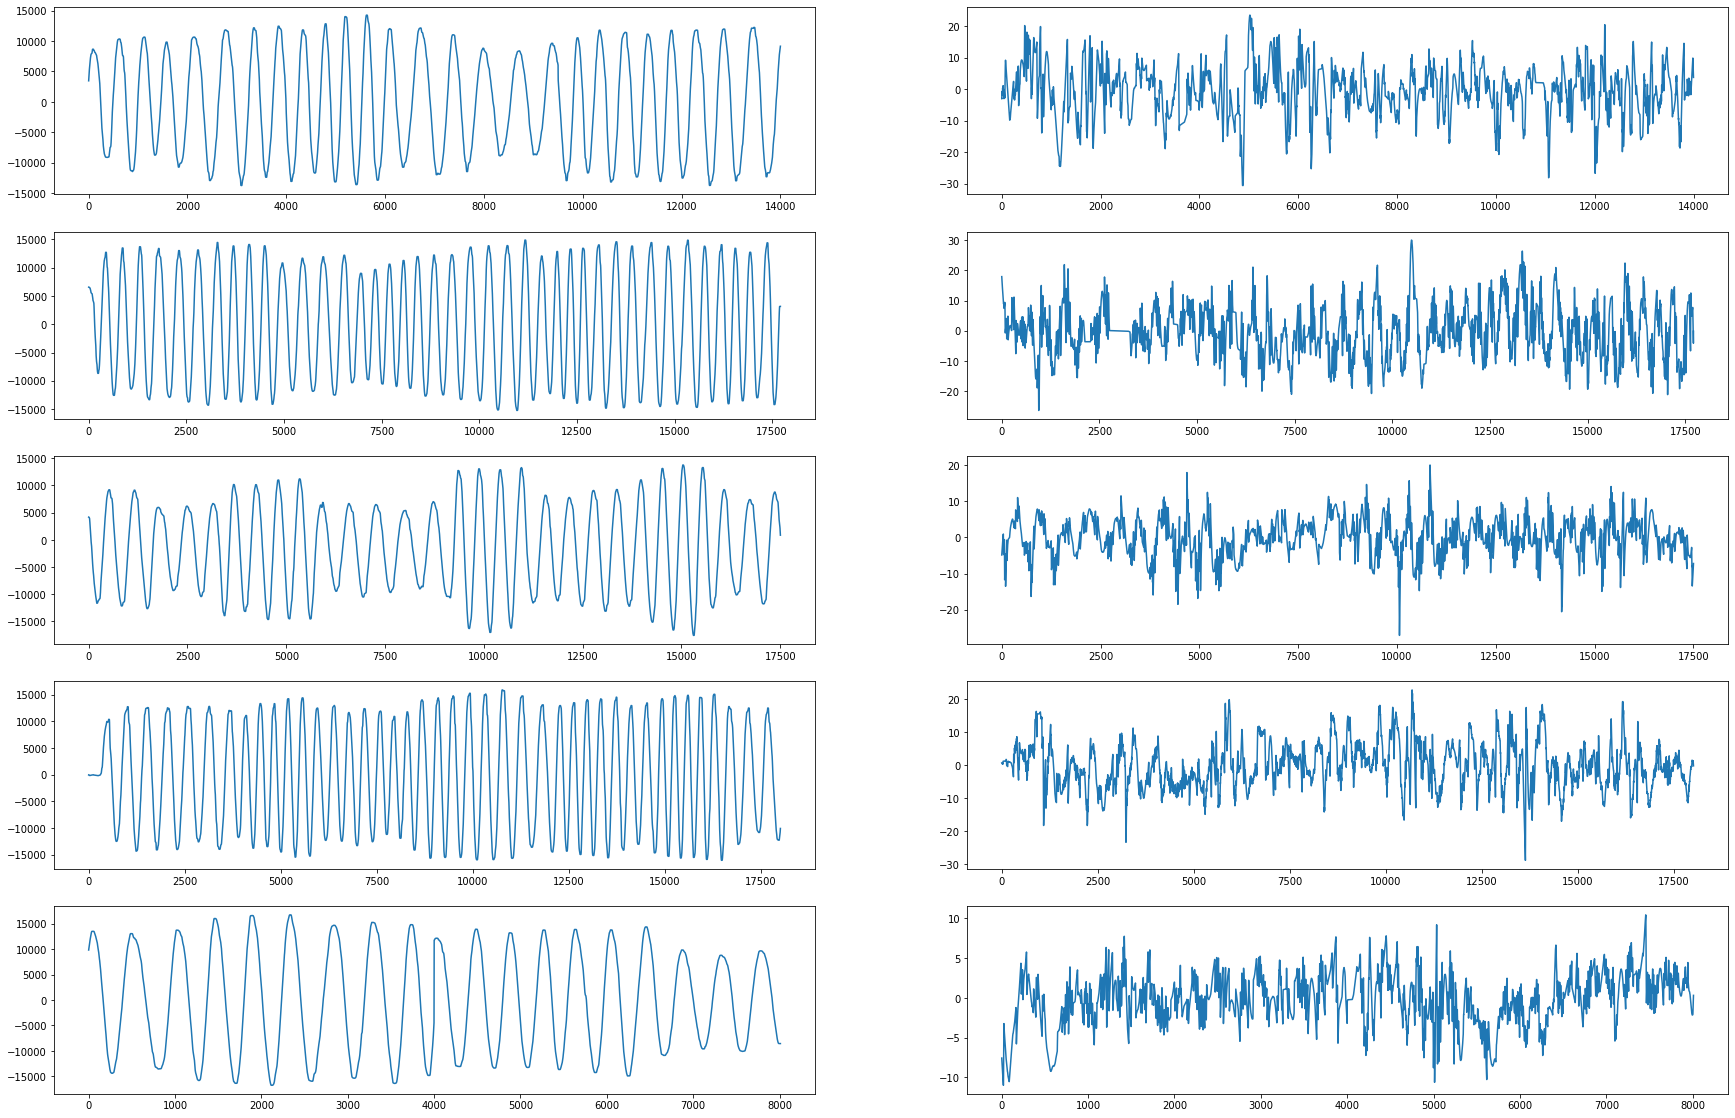

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows = 5, figsize=(30, 20))
n1 = 0
n2 = -1
ax[0][0].plot(x12[n1:n2], '-')
ax[0][1].plot(y12[n1:n2], '-')

ax[1][0].plot(x3[n1:n2], '-')
ax[1][1].plot(y3[n1:n2], '-')

ax[2][0].plot(x4[n1:n2], '-')
ax[2][1].plot(y4[n1:n2], '-')

ax[3][0].plot(x5[n1:n2], '-')
ax[3][1].plot(y5[n1:n2], '-')

ax[4][0].plot(x67[n1:n2], '-')
ax[4][1].plot(y67[n1:n2], '-')

plt.show()

In [ ]:
# df12 = pd.concat([df1, df2], axis = 0)
# df34 = pd.concat([df3, df4], axis = 0)
# df67 = pd.concat([df6, df7], axis = 0)

# df14 = pd.concat([df12, df34], axis = 0)

# df_train = pd.concat([df14, df67], axis = 0)

# df_test =df5

In [ ]:
# x_train = np.array(df_train['gx']).reshape(-1, 1)
# y_train = np.array(df_train['Hor_eye']).reshape(-1, 1)
# x_test = np.array(df_test['gx']).reshape(-1, 1)
# y_test = np.array(df_test['Hor_eye']).reshape(-1, 1)

In [ ]:
x_scaler = MinMaxScaler((-1,1))
y_scaler = MinMaxScaler((-1,1))

scaled_x12 = x_scaler.fit_transform(x12)
scaled_y12 = y_scaler.fit_transform(y12)

scaled_x3 = x_scaler.fit_transform(x3[4000:])
scaled_y3 = y_scaler.fit_transform(y3[4000:])

scaled_x4 = x_scaler.fit_transform(x4)
scaled_y4 = y_scaler.fit_transform(y4)

scaled_x5 = x_scaler.fit_transform(x5[500:])
scaled_y5 = y_scaler.fit_transform(y5[500:])



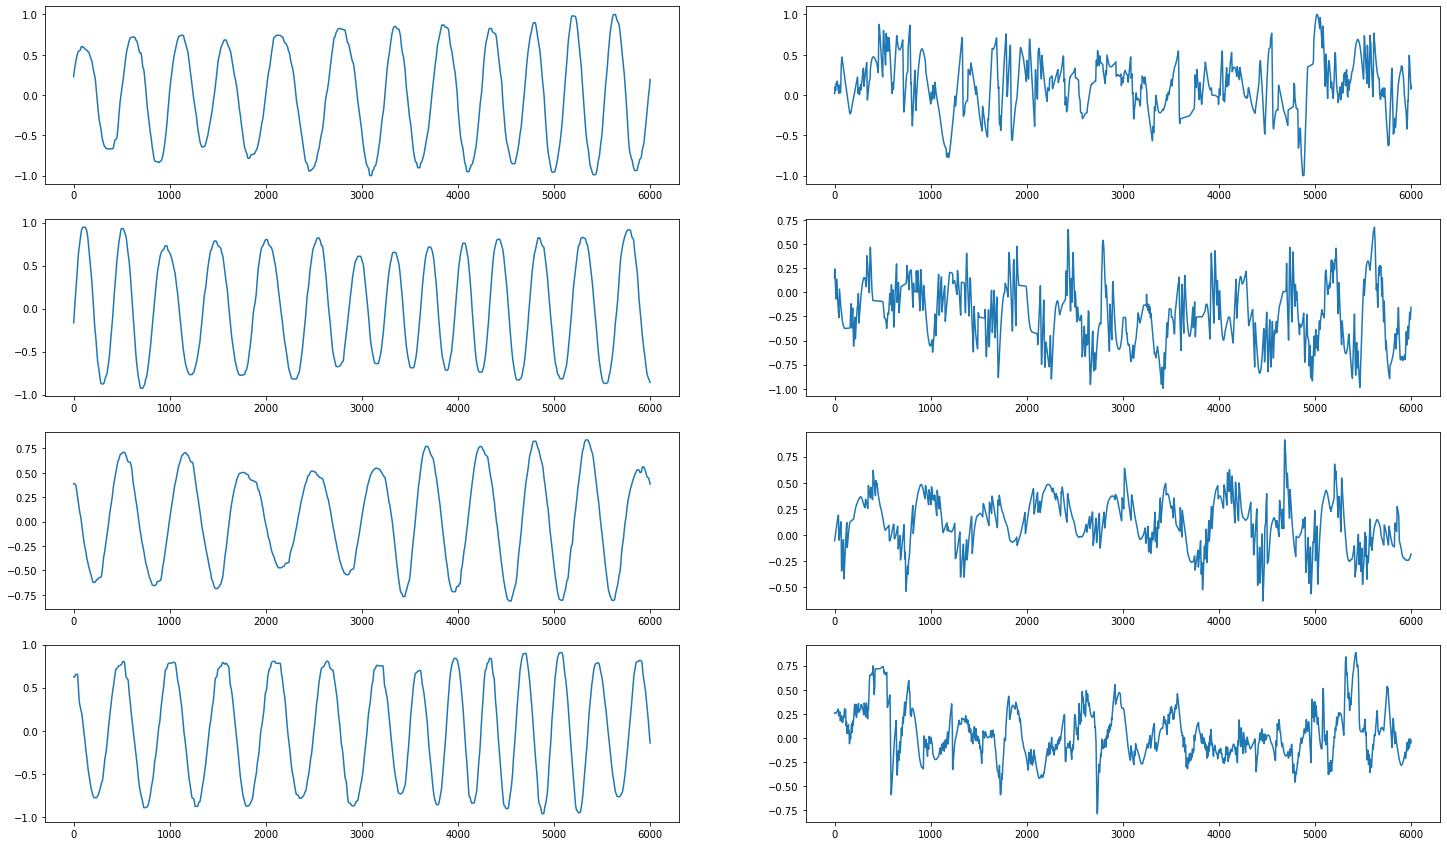

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows = 4, figsize=(25, 15))
n1 = 0
n2 = 6000
ax[0][0].plot(scaled_x12[n1:n2], '-')
ax[0][1].plot(scaled_y12[n1:n2], '-')

ax[1][0].plot(scaled_x3[n1:n2], '-')
ax[1][1].plot(scaled_y3[n1:n2], '-')

ax[2][0].plot(scaled_x4[n1:n2], '-')
ax[2][1].plot(scaled_y4[n1:n2], '-')

ax[3][0].plot(scaled_x5[n1:n2], '-')
ax[3][1].plot(scaled_y5[n1:n2], '-')

plt.show()

In [ ]:
x13 = np.concatenate((scaled_x12, scaled_x3), axis=0)
x_train = np.concatenate((x13, scaled_x4), axis=0)

y13 = np.concatenate((scaled_y12, scaled_y3), axis=0)
y_train = np.concatenate((y13, scaled_y4), axis=0)

x_test = scaled_x5
y_test = scaled_y5

In [ ]:
def make_feature_set_train(x_, y_, size_n):

    features_set = []
    labels = []

    n = size_n
    k = 1

    for i in range(n, len(x_)-k):
        feature_i = np.array([[x_[i-n:i, 0]], [y_[i-n:i, 0]]])
        feature_i = feature_i.reshape((feature_i.shape[0], feature_i.shape[2]))
        features_set.append(feature_i)
        labels.append(y_[i:i+k, 0])

    features_set, labels = np.array(features_set), np.array(labels)
    print(features_set[0].shape)
    print(features_set.shape, labels.shape)

    return features_set, labels

In [ ]:
def make_feature_set_test(x_, y_, size_n):

    features_set = []
    labels = []

    n = size_n
    k = 1

    for i in range(n, len(x_)):
        features_set.append(x_[i-n:i, 0])
        labels.append(y_[i-k:i, 0])

    features_set, labels = np.array(features_set), np.array(labels)
    features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
    labels = np.reshape(labels, (labels.shape[0], labels.shape[1], 1))

    print(features_set.shape, labels.shape)

    return features_set, labels

In [ ]:
size_n = 60
feature_train, label_train = make_feature_set_train(x_train, y_train, size_n)
feature_test, label_test = make_feature_set_train(x_test, y_test, size_n)

(2, 60)
(45157, 2, 60) (45157, 1)
(2, 60)
(17450, 2, 60) (17450, 1)


In [ ]:
import tensorflow as tf

In [ ]:
linear = tf.keras.models.Sequential()
linear.add(tf.keras.Input(shape=(2, feature_train.shape[2])))
linear.add(tf.keras.layers.Dense(40, activation='tanh'))
linear.add(tf.keras.layers.Dense(20, activation='tanh'))
linear.add(tf.keras.layers.Dense(1))
linear.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss = 'mse')

In [ ]:
linear.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2, 40)             2440      
                                                                 
 dense_4 (Dense)             (None, 2, 20)             820       
                                                                 
 dense_5 (Dense)             (None, 2, 1)              21        
                                                                 
Total params: 3,281
Trainable params: 3,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
result_linear = linear.fit(feature_train, label_train, epochs = 100, batch_size = 8, validation_split=0.2)

Epoch 1/100
4516/4516 [==============================] - 10s 2ms/step - loss: 0.0807 - val_loss: 0.0442
Epoch 2/100
4516/4516 [==============================] - 9s 2ms/step - loss: 0.0758 - val_loss: 0.0425
Epoch 3/100
4516/4516 [==============================] - 9s 2ms/step - loss: 0.0737 - val_loss: 0.0461
Epoch 4/100
4516/4516 [==============================] - 9s 2ms/step - loss: 0.0721 - val_loss: 0.0424
Epoch 5/100
4516/4516 [==============================] - 9s 2ms/step - loss: 0.0709 - val_loss: 0.0443
Epoch 6/100
4516/4516 [==============================] - 9s 2ms/step - loss: 0.0698 - val_loss: 0.0439
Epoch 7/100
4516/4516 [==============================] - 9s 2ms/step - loss: 0.0687 - val_loss: 0.0419
Epoch 8/100
4516/4516 [==============================] - 9s 2ms/step - loss: 0.0674 - val_loss: 0.0408
Epoch 9/100
4516/4516 [==============================] - 9s 2ms/step - loss: 0.0662 - val_loss: 0.0374
Epoch 10/100
4516/4516 [==============================] - 9s 2ms/step - 

In [ ]:
# u = 50
# model_lstm = tf.keras.models.Sequential()
# model_lstm.add(tf.keras.layers.LSTM(units= u, return_sequences=True, input_shape=(feature_train.shape[1], 2)))
# model_lstm.add(tf.keras.layers.Dropout(0.4))

# model_lstm.add(tf.keras.layers.LSTM(units=u))
# model_lstm.add(tf.keras.layers.Dropout(0.2))

# model_lstm.add(tf.keras.layers.Dense(units = label_train.shape[1]))

# model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss = 'mean_squared_error')

In [ ]:
# model_lstm.summary()

In [ ]:
# result_lstm = model_lstm.fit(feature_train, label_train, epochs = 20, batch_size = 32, validation_split=0.2)

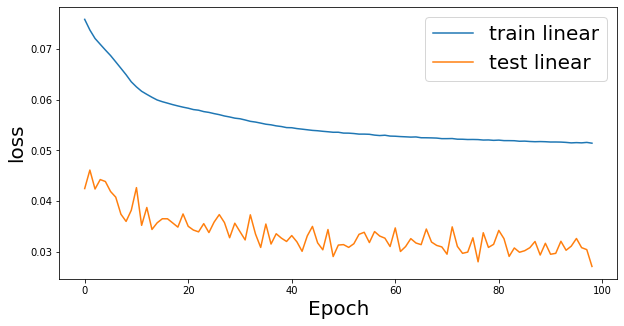

In [ ]:
plt.figure(figsize=(10,5), facecolor='w')
# plt.plot(result_lstm.history['loss'][1:], label='train LSTM')
# plt.plot(result_lstm.history['val_loss'][1:], label='test LSTM')
plt.plot(result_linear.history['loss'][1:], label='train linear')
plt.plot(result_linear.history['val_loss'][1:], label='test linear')
plt.legend(fontsize=20)
plt.xlabel('Epoch',  fontsize=20)
plt.ylabel('loss',  fontsize=20)
plt.show()

In [ ]:
predictions_linear = linear.predict(feature_test)
# predictions_lstm = model_lstm.predict(feature_test)

546/546 [==============================] - 1s 1ms/step


In [ ]:
predictions_linear[:,0]

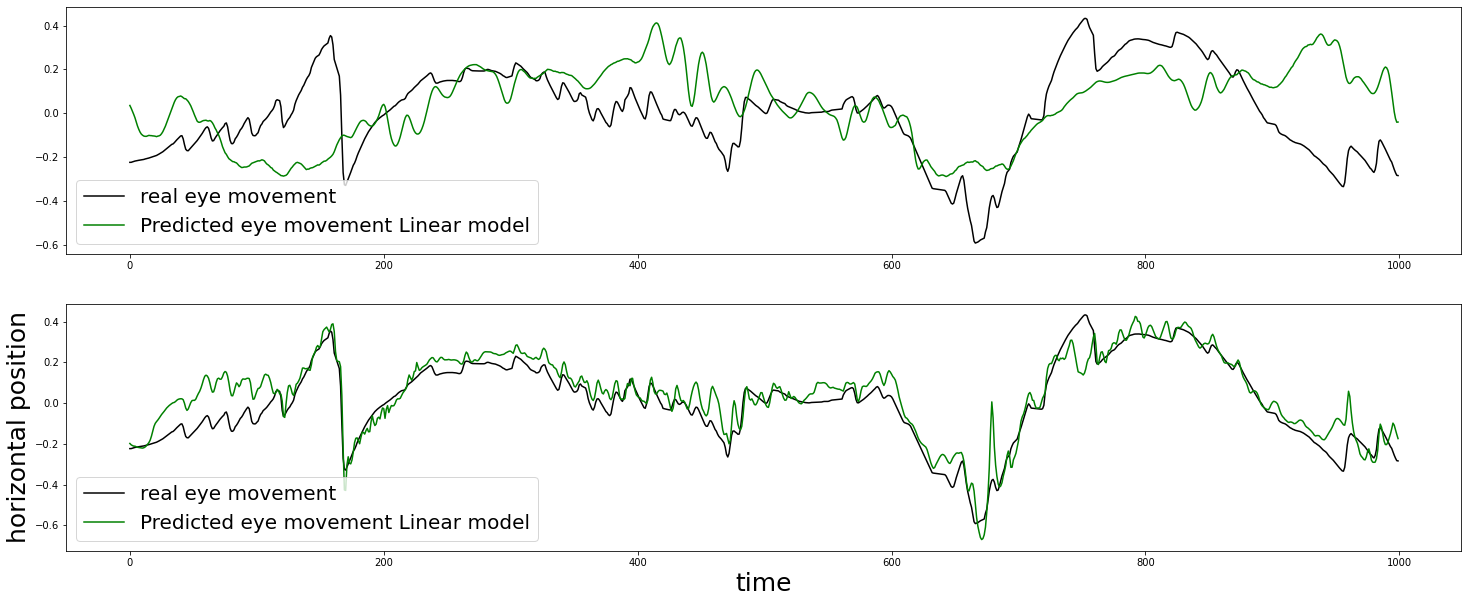

In [ ]:
y_test = y_test.reshape((y_test.shape[0],))
fig, ax = plt.subplots(ncols=1, nrows = 2, figsize=(25, 10))
fig.patch.set_facecolor('white')
n1 = 1000
n2 = 2000

# ax[0].plot(y_test[n1+60:n2+60], color='black', label='real eye movement')
# ax[0].plot(predictions_lstm[n1:n2], color='blue', label='Predicted eye movement LSTM')

ax[0].plot(y_test[n1+60:n2+60], color='black', label='real eye movement')
ax[0].plot(predictions_linear[:,0][n1:n2], color='green', label='Predicted eye movement Linear model')

ax[1].plot(y_test[n1+60:n2+60], color='black', label='real eye movement')
ax[1].plot(predictions_linear[:,1][n1:n2], color='green', label='Predicted eye movement Linear model')

plt.xlabel('time', fontsize=25)
plt.ylabel('horizontal position', fontsize=25)

ax[0].legend(fontsize=20)
ax[1].legend(fontsize=20)

plt.show()

In [ ]:
# x_train2 = scaled_x5
# y_train2 = scaled_y5
# x_test2 = scaled_x5[0:5000]
# y_test2 = scaled_y5[0:5000]

In [ ]:
# x_scaler = MinMaxScaler((-1,1))
# y_scaler = MinMaxScaler((-1,1))

# scaled_x_train = x_scaler.fit_transform(x_train2)
# scaled_y_train = y_scaler.fit_transform(y_train2)

# scaled_x_test = x_scaler.transform(x_test2)
# scaled_y_test = y_scaler.transform(y_test2)

In [ ]:
# size_n = 100
# feature_train, label_train = make_feature_set(x_train2, y_train2, size_n)
# feature_test, label_test = make_feature_set(x_test2, y_test2, size_n)